In [1]:
import data_analysis
import pandas as pd
import tensorflow as tf
import string
import numpy as np
import spacy
import data_analysis

from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
df = pd.read_json(open("final_dataset/merged_dataset.json", "r", encoding="utf8"))

print(df.info())
print('\n')
print(df.describe())
print('\n')
print(df.isna().sum())
print('\n')
print(df['themes'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10665 entries, 0 to 10664
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      10665 non-null  object 
 1   url        10665 non-null  object 
 2   author     10665 non-null  object 
 3   year       10520 non-null  float64
 4   text       10664 non-null  object 
 5   themes     9447 non-null   object 
 6   occasions  2580 non-null   object 
 7   forms      837 non-null    object 
dtypes: float64(1), object(7)
memory usage: 666.7+ KB
None


               year
count  10520.000000
mean    1979.957224
std       70.301632
min     1374.000000
25%     1983.000000
50%     2010.000000
75%     2016.000000
max     2021.000000


title           0
url             0
author          0
year          145
text            1
themes       1218
occasions    8085
forms        9828
dtype: int64


0                                   NaN
1                               [audio]
2         

In [3]:
topics = data_analysis.scrape_topics()
print(topics)

['afterlife', 'aging', 'ambition', 'america', 'american revolution', 'americana', 'ancestry', 'anger', 'animals', 'anxiety', 'apocalypse', 'audio', 'beauty', 'beginning', 'birds', 'body', 'brothers', 'buildings', 'carpe diem', 'cats', 'childhood', 'cities', 'civil war', 'clothing', 'cooking', 'creation', 'dance', 'daughters', 'death', 'deception', 'desire', 'despair', 'divorce', 'dogs', 'doubt', 'dreams', 'drinking', 'drugs', 'earth', 'eating', 'economy', 'enemies', 'environment', 'existential', 'family', 'fathers', 'flight', 'flowers', 'for children', 'for mom', 'for teens', 'friendship', 'future', 'gardens', 'gender', 'ghosts', 'gratitude', 'grief', 'gun violence', 'happiness', 'heartache', 'heroes', 'high school', 'history', 'home', 'hope', 'humor', 'identity', 'illness', 'immigration', 'incarceration', 'infidelity', 'innocence', 'jealousy', 'lgbtq', 'landscapes', 'language', 'loneliness', 'loss', 'love', 'love, contemporary', 'luck', 'lust', 'marriage', 'math', 'memories', 'migrati

In [4]:
encoded_topics = data_analysis.encode_topics(topics)
print(encoded_topics)

{'afterlife': 0, 'aging': 1, 'ambition': 2, 'america': 3, 'american revolution': 4, 'americana': 5, 'ancestry': 6, 'anger': 7, 'animals': 8, 'anxiety': 9, 'apocalypse': 10, 'audio': 11, 'beauty': 12, 'beginning': 13, 'birds': 14, 'body': 15, 'brothers': 16, 'buildings': 17, 'carpe diem': 18, 'cats': 19, 'childhood': 20, 'cities': 21, 'civil war': 22, 'clothing': 23, 'cooking': 24, 'creation': 25, 'dance': 26, 'daughters': 27, 'death': 28, 'deception': 29, 'desire': 30, 'despair': 31, 'divorce': 32, 'dogs': 33, 'doubt': 34, 'dreams': 35, 'drinking': 36, 'drugs': 37, 'earth': 38, 'eating': 39, 'economy': 40, 'enemies': 41, 'environment': 42, 'existential': 43, 'family': 44, 'fathers': 45, 'flight': 46, 'flowers': 47, 'for children': 48, 'for mom': 49, 'for teens': 50, 'friendship': 51, 'future': 52, 'gardens': 53, 'gender': 54, 'ghosts': 55, 'gratitude': 56, 'grief': 57, 'gun violence': 58, 'happiness': 59, 'heartache': 60, 'heroes': 61, 'high school': 62, 'history': 63, 'home': 64, 'hop

In [5]:
row = df['themes'][1]
print(row)
encoded = data_analysis.encode_column(row)
print(encoded)

['audio']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
df = df[df['themes'].notna()]
df['themes'] = df['themes'].apply(data_analysis.encode_column)
print(df['themes'])

1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
10659    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10660    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10661    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10662    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10664    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: themes, Length: 9447, dtype: object


#### Using added functions to clear df and encode authors

In [7]:
df.head()

,title,url,author,year,text,themes,occasions,forms
1,Body and Soul II,https://poets.org/poem/body-and-soul-ii,Charles Wright,2002.0,(for Coleman Hawkins)\nThe structure of landsc...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
2,Novel,https://poets.org/poem/novel,Arthur Rimbaud,2002.0,I.\n\nNo one's serious at seventeen.\n—On beau...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[lgbtq pride month],NaN
3,Flying,https://poets.org/poem/flying,Sarah Arvio,2002.0,One said to me tonight or was it day \nor was ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
5,Photograph of People Dancing in France,https://poets.org/poem/photograph-people-danci...,Leslie Adrienne Miller,2002.0,It's true that you don't know them--nor do I \...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,[ekphrastic]
6,Borrowed Dress,https://poets.org/poem/borrowed-dress,Cathy Colman,2001.0,"He left the room, assured of his immortality--...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN


In [8]:
df.shape

(9447, 8)

In [9]:
df = data_analysis.clear_nans(df)
df.shape

(9326, 6)

In [10]:
df.isna().sum()

title     0
url       0
author    0
year      0
text      0
themes    0
dtype: int64

In [11]:
df

,title,url,author,year,text,themes
0,Body and Soul II,https://poets.org/poem/body-and-soul-ii,Charles Wright,2002.0,(for Coleman Hawkins)\nThe structure of landsc...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Novel,https://poets.org/poem/novel,Arthur Rimbaud,2002.0,I.\n\nNo one's serious at seventeen.\n—On beau...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Flying,https://poets.org/poem/flying,Sarah Arvio,2002.0,One said to me tonight or was it day \nor was ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Photograph of People Dancing in France,https://poets.org/poem/photograph-people-danci...,Leslie Adrienne Miller,2002.0,It's true that you don't know them--nor do I \...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Borrowed Dress,https://poets.org/poem/borrowed-dress,Cathy Colman,2001.0,"He left the room, assured of his immortality--...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
9321,Who Has Seen the Wind?,https://poets.org/poem/who-has-seen-wind,Christina Rossetti,1893.0,Who has seen the wind?\nNeither I nor you.\nBu...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9322,Block City,https://poets.org/poem/block-city,Robert Louis Stevenson,1913.0,What are you able to build with your blocks?\n...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9323,The Sick Child,https://poets.org/poem/sick-child,Robert Louis Stevenson,1887.0,"CHILD.\nO Mother, lay your hand on my brow!\nO...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9324,The Celestial Surgeon,https://poets.org/poem/celestial-surgeon,Robert Louis Stevenson,1887.0,If I have faltered more or less\nIn my great t...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [12]:
df = data_analysis.init_author_encoding(df)
df.head()

,title,url,author,year,text,themes
0,Body and Soul II,https://poets.org/poem/body-and-soul-ii,401,2002.0,(for Coleman Hawkins)\nThe structure of landsc...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Novel,https://poets.org/poem/novel,222,2002.0,I.\n\nNo one's serious at seventeen.\n—On beau...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Flying,https://poets.org/poem/flying,2263,2002.0,One said to me tonight or was it day \nor was ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Photograph of People Dancing in France,https://poets.org/poem/photograph-people-danci...,1528,2002.0,It's true that you don't know them--nor do I \...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Borrowed Dress,https://poets.org/poem/borrowed-dress,371,2001.0,"He left the room, assured of his immortality--...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


###  Text preprocessing

In [13]:
#  set up data types
df = df.astype({'text': 'str', 'year': 'int32'})

#  change the texts to lowercase
df['text'] = df['text'].str.lower()
df['title'] = df['title'].str.lower()

# Drop empty texts
df['text'].replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)

#  Remove punctuation
table = str.maketrans('', '', string.punctuation)
df['text'] = [row['text'].translate(table) for index, row in df.iterrows()]
df['title'] = [row['title'].translate(table) for index, row in df.iterrows()]


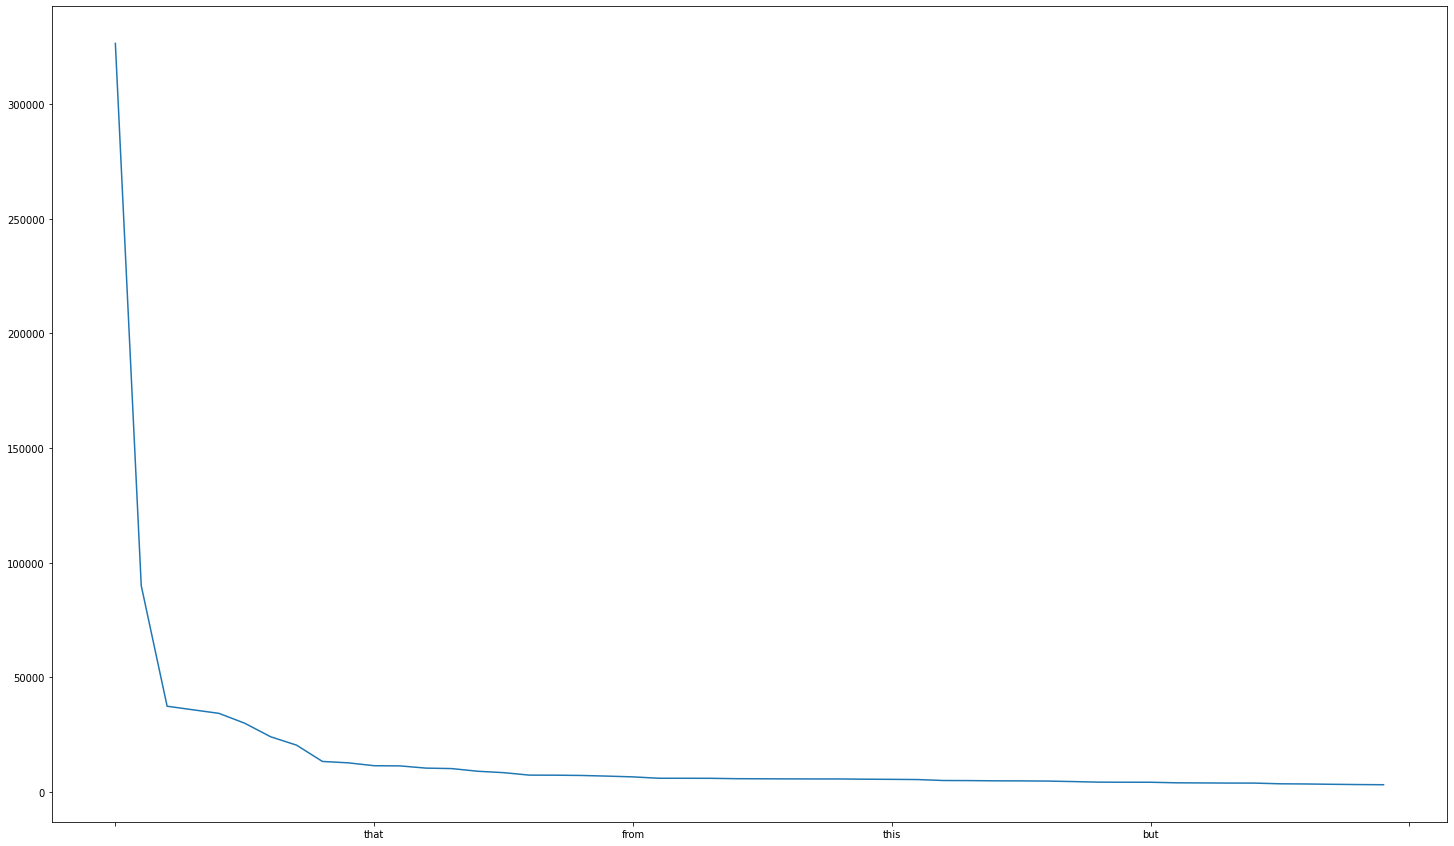

In [14]:
#  Plot the words distribution
freq = pd.Series(' '.join(df['text']).split(' ')).value_counts()
freq[:50].plot(figsize=(25, 15))

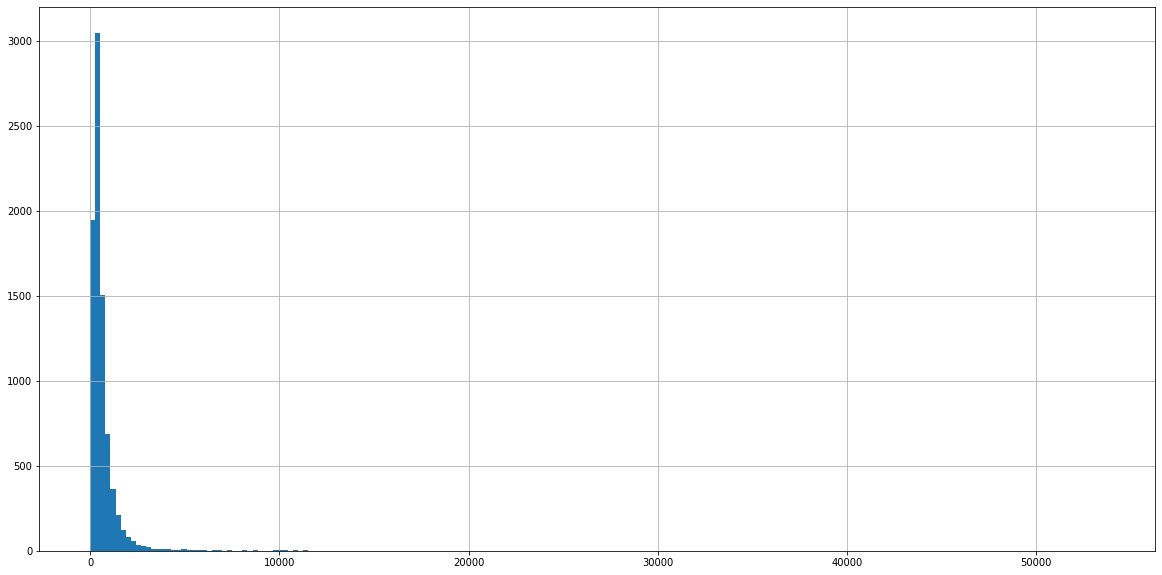

In [17]:
#  Texts length distribution
texts_len = df['text'].apply(len)
texts_len.hist(bins=200, figsize=(20, 10))